# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.2 Introduction<a id='2.2_Introduction'></a>

### 2.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to come up with a pricing model for ski resort tickets in our market segment. Big Mountain suspects it may not be maximizing its returns, relative to its position in the market. It also does not have a strong sense of what facilities matter most to visitors, particularly which ones they're most likely to pay more for. This project aims to build a predictive model for ticket price based on a number of facilities, or properties, boasted by resorts (*at the resorts).* 
This model will be used to provide guidance for Big Mountain's pricing and future facility investment plans.

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
#!pip3 install matplotlib
#!pip3 install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


#from library.sb_utils import save_file


## 2.4 Objectives<a id='2.4_Objectives'></a>


* Do we have the data we need to tackle the desired question?
    * identified the required target value?
    * potentially useful features?
* Any fundamental issues with the data?

## 2.5 Load The Ski Resort Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [2]:
# the supplied CSV data file is the raw_data directory
ski_data = pd.read_csv('../raw_data/ski_resort_data.csv')

In [3]:
#Call the info method on ski_data to see a summary of the data
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

`AdultWeekday` is the price of an adult weekday ticket. `AdultWeekend` is the price of an adult weekend ticket. The other columns are potential features.

In [4]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


 missing value in the `fastEight` column

## 2.6 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.6.1 Find Resort Of Interest<a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

Resort of interest is called Big Mountain Resort. Check it's in the data:

In [1]:
ski_data[ski_data.Name == 'Big Mountain Resort'].T

NameError: name 'ski_data' is not defined

### 2.6.2 Number Of Missing Values By Column<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

In [6]:
missing = pd.concat(   [ski_data.isnull().sum()   ,    100 * ski_data.isnull().mean()]    , axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Name,0,0.000000
total_chairs,0,0.000000
double,0,0.000000
triple,0,0.000000
quad,0,0.000000
fastQuads,0,0.000000
fastSixes,0,0.000000
surface,0,0.000000
trams,0,0.000000
base_elev,0,0.000000


### 2.6.3 Categorical Features<a id='2.6.3_Categorical_Features'></a>

In [7]:
ski_data.select_dtypes('object')

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming



* Is `Name` (or at least a combination of Name/Region/State) unique?
* Is `Region` always the same as `state`?

#### 2.6.3.1 Unique Resort Names<a id='2.6.3.1_Unique_Resort_Names'></a>

In [8]:
#`value_counts` to find any duplicated resort names
ski_data['Name'].value_counts().head()

Name
Crystal Mountain    2
Alyeska Resort      1
Brandywine          1
Boston Mills        1
Alpine Valley       1
Name: count, dtype: int64

duplicated resort name: Crystal Mountain.

Is this resort duplicated if you take into account Region and/or state as well?

In [9]:
#Concatenate the string columns 'Name' and 'Region' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['Region']).value_counts().head()

Alyeska Resort, Alaska    1
Snow Trails, Ohio         1
Brandywine, Ohio          1
Boston Mills, Ohio        1
Alpine Valley, Ohio       1
Name: count, dtype: int64

In [10]:
#Concatenate 'Name' and 'state' and count the values again
(ski_data['Name'] + ', ' + ski_data['state']).value_counts().head()

Alyeska Resort, Alaska    1
Snow Trails, Ohio         1
Brandywine, Ohio          1
Boston Mills, Ohio        1
Alpine Valley, Ohio       1
Name: count, dtype: int64

**A: 1** No it is not a duplicate. Isolating all lines of ski_data where Name = Crystal Mountain shows that there appear to be two different Crystal Mountain resorts in the US, one in Washington and one in Michigan.

In [12]:
ski_data[ski_data['Name'] == 'Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


So there are two Crystal Mountain resorts, but they are clearly two different resorts in two different states. This is a powerful signal that we have unique records on each row.

#### 2.6.3.2 Region And State<a id='2.6.3.2_Region_And_State'></a>

What's the relationship between region and state?

In how many cases do they differ?

In [13]:
#Calculate the number of times Region does not equal state
(ski_data.Region != ski_data.state).sum()

33

What is a region? Tabulate the distinct values along with their respective frequencies using `value_counts()`.

In [14]:
ski_data['Region'].value_counts()

Region
New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Salt Lake City          6
North Carolina          6
Oregon                  6
Connecticut             5
Ohio                    5
Virginia                4
West Virginia           4
Illinois                4
Mt. Hood                4
Alaska                  3
Iowa                    3
South Dakota            2
Arizona                 2
Nevada                  2
Missouri                2
Indiana                 2
New Jersey              2
Rhode Island            1
Tennessee               1
Maryland                1
Northern California     1
Name:

A casual inspection by eye reveals some non-state names such as Sierra Nevada, Salt Lake City, and Northern California. 

In [15]:

(ski_data[ski_data['Region'] != ski_data['state']]
 .groupby('state')['Region']
 .value_counts())

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: count, dtype: int64

The vast majority of the differences are in California, with most Regions being called Sierra Nevada and just one referred to as Northern California.

#### 2.6.3.3 Number of distinct regions and states<a id='2.6.3.3_Number_of_distinct_regions_and_states'></a>

In [16]:

ski_data[['Region', 'state']].nunique()

Region    38
state     35
dtype: int64

Because a few states are split across multiple named regions, there are slightly more unique regions than states.

#### 2.6.3.4 Distribution Of Resorts By Region And State<a id='2.6.3.4_Distribution_Of_Resorts_By_Region_And_State'></a>

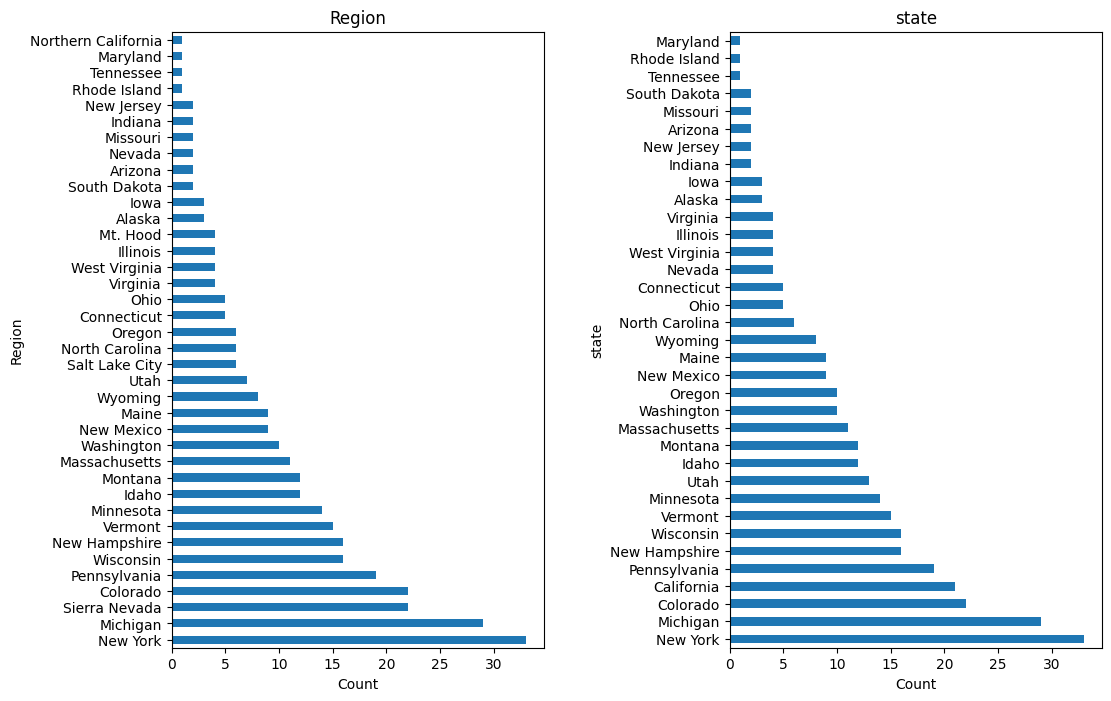

In [17]:
#Create two subplots
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot
ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Region')
ax[0].set_xlabel('Count')

#Specify a horizontal barplot
ski_data.state.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('state')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);


How's overall geography? Looking at the distribution of States, you see New York accounting for the majority of resorts. Our target resort is in Montana, which comes in at 13th place.  Does New York command a premium because of its proximity to population? Even if a resort's State were a useful predictor of ticket price, your main interest lies in Montana. Should we filter for Montana and create a Montana-specific model? This would slash available data volume. 

#### 2.6.3.5 Distribution Of Ticket Price By State<a id='2.6.3.5_Distribution_Of_Ticket_Price_By_State'></a>

##### 2.6.3.5.1 Average weekend and weekday price by state<a id='2.6.3.5.1_Average_weekend_and_weekday_price_by_state'></a>

In [18]:
state_price_means = ski_data.groupby('state')[['AdultWeekend', 'AdultWeekday']].mean()
state_price_means.head()

,AdultWeekend,AdultWeekday
state,,
Alaska,57.333333,47.333333
Arizona,83.500000,81.500000
California,81.416667,78.214286
Colorado,90.714286,90.714286
Connecticut,56.800000,47.800000


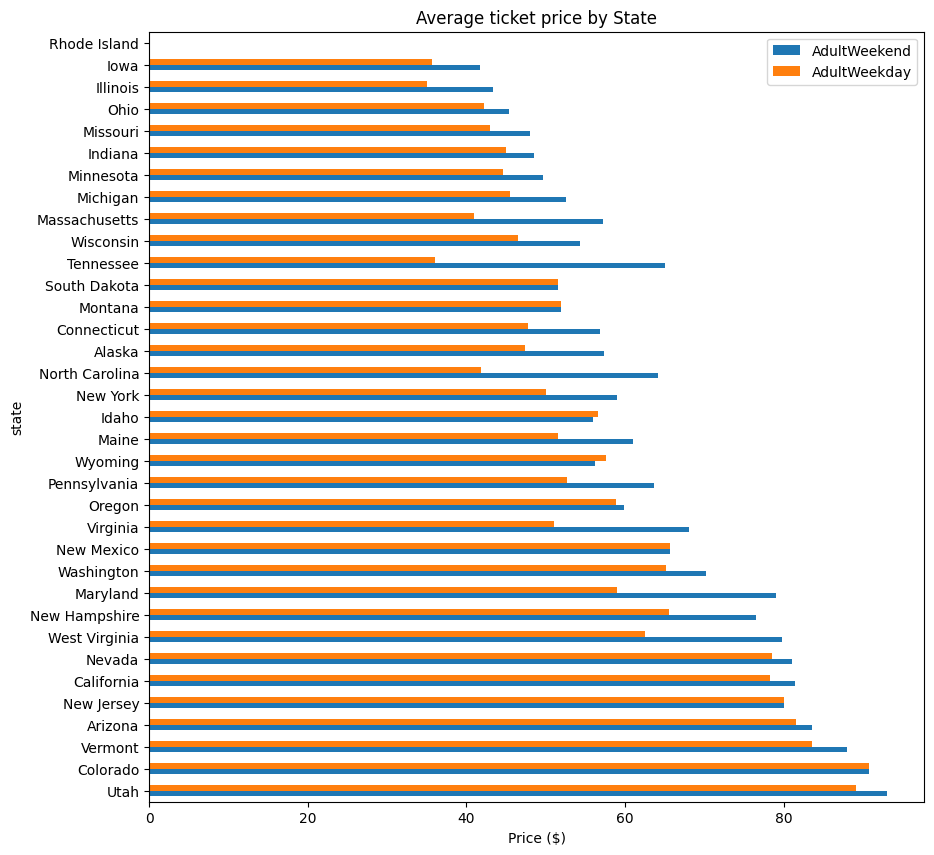

In [19]:
(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
plt.xlabel('Price ($)');

##### 2.6.3.5.2 Distribution of weekday and weekend price by state<a id='2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state'></a>

Transform the data into a single column for price with a new categorical column that represents the ticket type.

In [21]:
#Use the pd.melt function, pass in the ski_data columns 'state', 'AdultWeekday', and 'Adultweekend' only,

#gather the ticket prices from the 'Adultweekday' and 'AdultWeekend' columns using the `value_vars` argument,
ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday', 'AdultWeekend']], 
                        id_vars='state', 
                        var_name='Ticket', 
                        value_vars=['AdultWeekday', 'AdultWeekend'], 
                        value_name='Price')

In [22]:
ticket_prices.head()

,state,Ticket,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


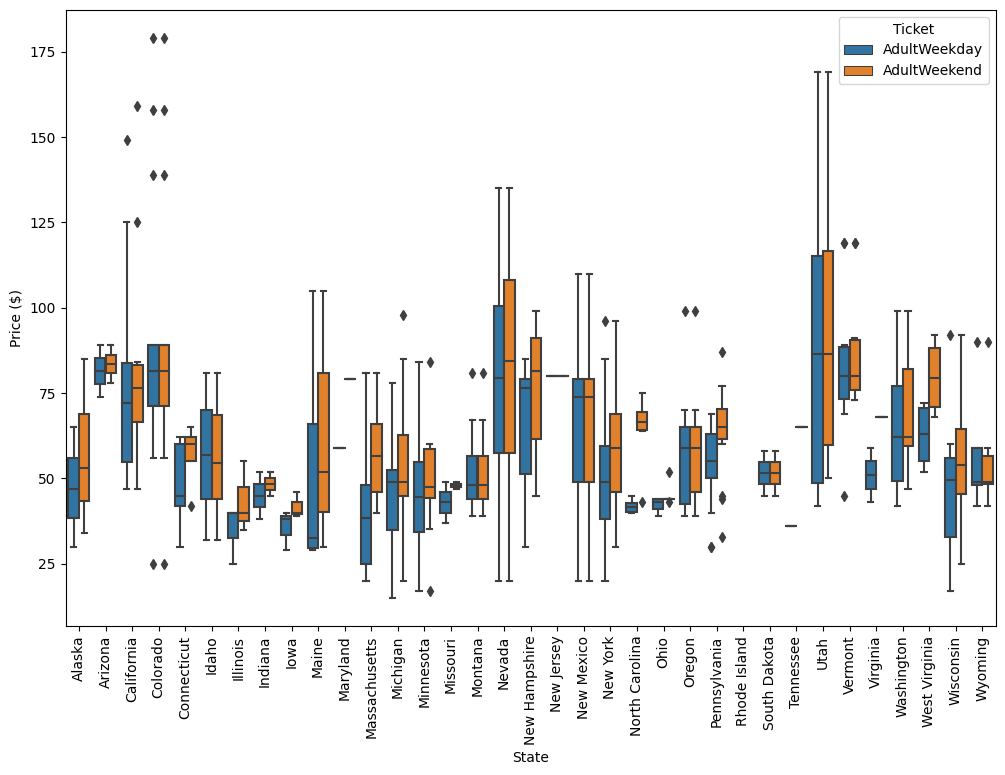

In [23]:
#Create a seaborn boxplot of the ticket price dataframe 
plt.subplots(figsize=(12, 8))
sns.boxplot(x='state', y='Price', hue='Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State');

Aside from some relatively expensive ticket prices in California, Colorado, and Utah, most prices appear to lie in a broad band from around 25 to over 100 dollars. Some States show more variability than others. Montana and South Dakota, for example, both show fairly small variability as well as matching weekend and weekday ticket prices. Nevada and Utah, on the other hand, show the most range in prices. 

Thus we currently have two main questions you want to resolve:

* What do we do about the two types of ticket price?
* What do we do about the state information?

### 2.6.4 Numeric Features<a id='2.6.4_Numeric_Features'></a>

#### 2.6.4.1 Numeric data summary<a id='2.6.4.1_Numeric_data_summary'></a>

In [25]:
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


Missing the ticket prices for some 16% of resorts.

In [26]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.424242
2    14.242424
1     3.333333
Name: count, dtype: float64

#### 2.6.4.2 Distributions Of Feature Values<a id='2.6.4.2_Distributions_Of_Feature_Values'></a>

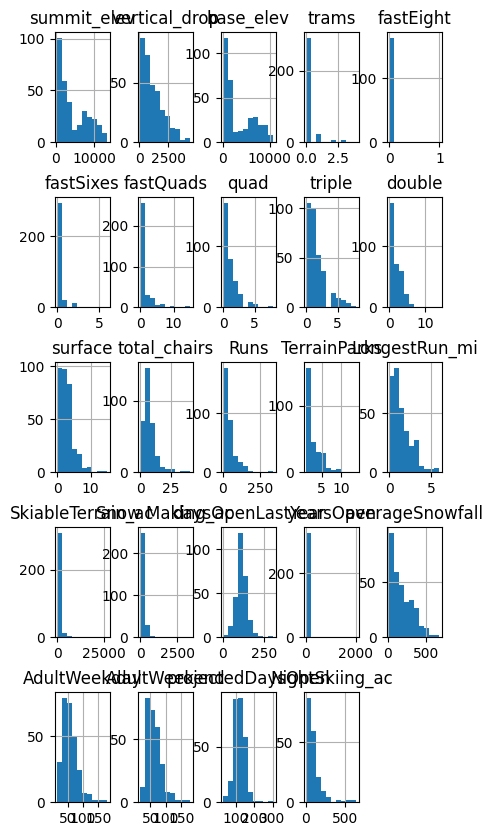

In [27]:
ski_data.hist(figsize=(5,10))
plt.subplots_adjust(hspace=0.5, wspace = 0.5);

What features do we have possible cause for concern about and why?

* SkiableTerrain_ac because values are clustered down the low end,
* Snow Making_ac for the same reason,
* fastEight because all but one value is 0 so it has very little variance, and half the values are missing,
* fastSixes raises an amber flag; it has more variability, but still mostly 0,
* trams also may get an amber flag for the same reason,
* yearsOpen because most values are low but it has a maximum of 2019, which strongly suggests someone recorded calendar year rather than number of years.

##### 2.6.4.2.1 SkiableTerrain_ac<a id='2.6.4.2.1_SkiableTerrain_ac'></a>

**Q: 2** One resort has an incredibly large skiable terrain area! Which is it?

In [29]:
ski_data[ski_data['SkiableTerrain_ac'] > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0.0
fastSixes,0
fastQuads,0


**A: 2** Silverton Mountain, CO

In [30]:
#Code task#
#Use the .loc accessor to print the 'SkiableTerrain_ac' value only for this resort
ski_data.loc[39, 'SkiableTerrain_ac']

26819.0

In [31]:
#Code task#
#Use the .loc accessor again to modify this value with the correct value of 1819
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [32]:
#Code task#
#Use the .loc accessor a final time to verify that the value has been modified
ski_data.loc[39, 'SkiableTerrain_ac']

1819.0

What does the distribution of skiable area look like now?

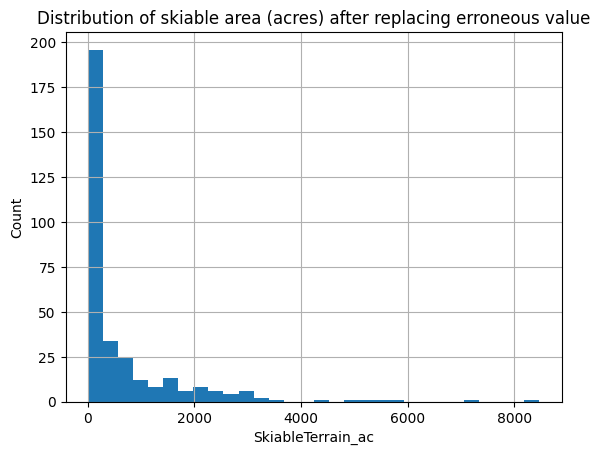

In [33]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

##### 2.6.4.2.2 Snow Making_ac<a id='2.6.4.2.2_Snow_Making_ac'></a>

In [34]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [35]:
ski_data[ski_data['Snow Making_ac'] > 3000].T

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0.0
fastSixes,2
fastQuads,7


##### 2.6.4.2.3 fastEight<a id='2.6.4.2.3_fastEight'></a>

Look at the different fastEight values more closely:

In [37]:
ski_data.fastEight.value_counts()

fastEight
0.0    163
1.0      1
Name: count, dtype: int64

Drop the fastEight column in its entirety; half the values are missing and all but the others are the value zero. There is essentially no information in this column.

In [38]:
#Drop the 'fastEight' column from ski_data
ski_data.drop(columns='fastEight', inplace=True)

What about yearsOpen? How many resorts have purportedly been open for more than 100 years?

In [39]:
#Filter the 'yearsOpen' column for values greater than 100
ski_data.loc[ski_data['yearsOpen'] > 100]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
34,Howelsen Hill,Colorado,Colorado,7136,440,6696,0,0,0,0,...,6.0,50.0,25.0,100.0,104.0,150.0,25.0,25.0,100.0,10.0
115,Pine Knob Ski Resort,Michigan,Michigan,1308,300,1009,0,0,0,0,...,1.0,80.0,80.0,NaN,2019.0,NaN,49.0,57.0,NaN,NaN


What does the distribution of yearsOpen look like if you exclude just the obviously wrong one?

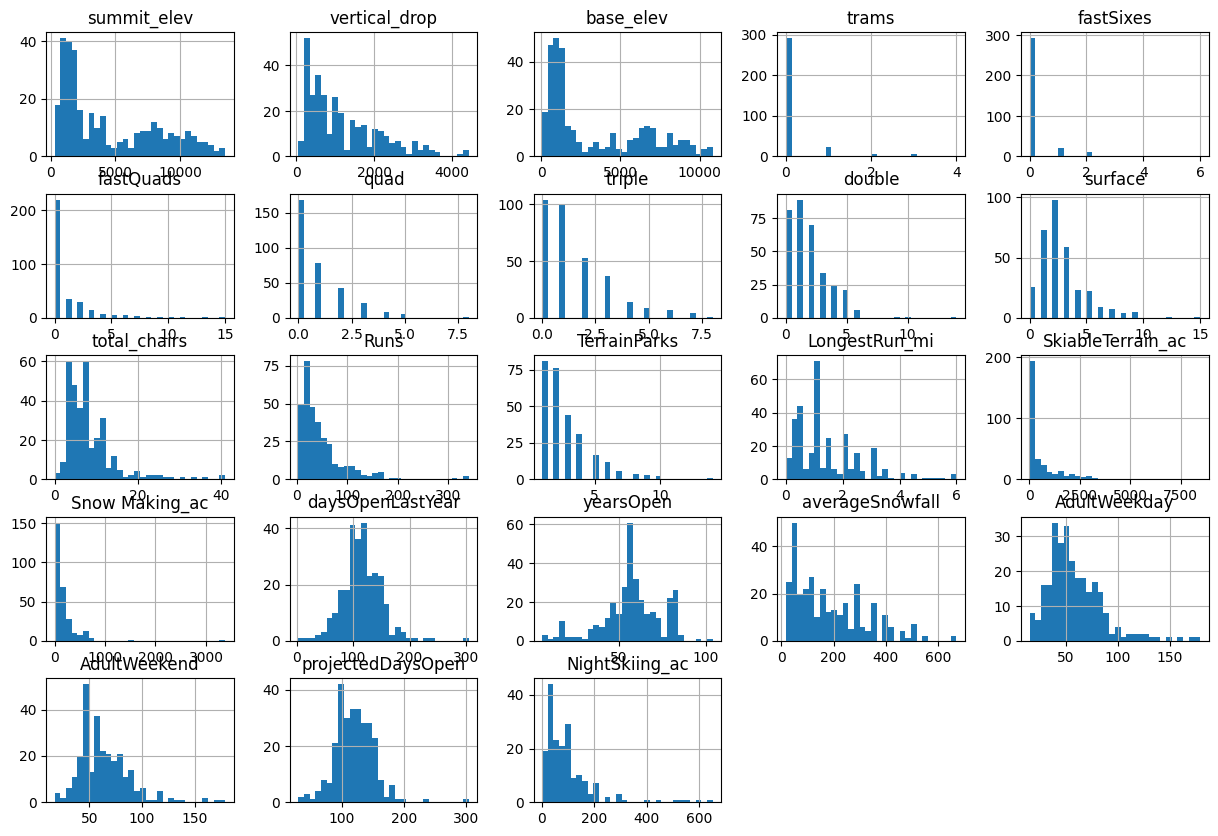

In [40]:
ski_data.loc[ski_data['yearsOpen'] < 1000].hist(bins=30, figsize=(15,10))
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');

## 2.7 Derive State-wide Summary Statistics For Our Market Segment<a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

In [43]:
#Add named aggregations for the sum of 'daysOpenLastYear', 'TerrainParks', and 'NightSkiing_ac'

state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), #could pick any column here
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks=pd.NamedAgg(column='TerrainParks', aggfunc='sum'),
    state_total_nightskiing_ag=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ag
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


## 2.8 Drop Rows With No Price Data<a id='2.8_Drop_Rows_With_No_Price_Data'></a>

In [44]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.317073
2    14.329268
1     3.353659
Name: count, dtype: float64

About 14% of the rows have no price data. As the price is your target, these rows are of no use. Time to lose them.

In [45]:
#Code task 28#
#Use `missing_price` to remove rows from ski_data where both price values are missing
ski_data = ski_data[missing_price != 2]

## 2.9 Review distributions<a id='2.9_Review_distributions'></a>

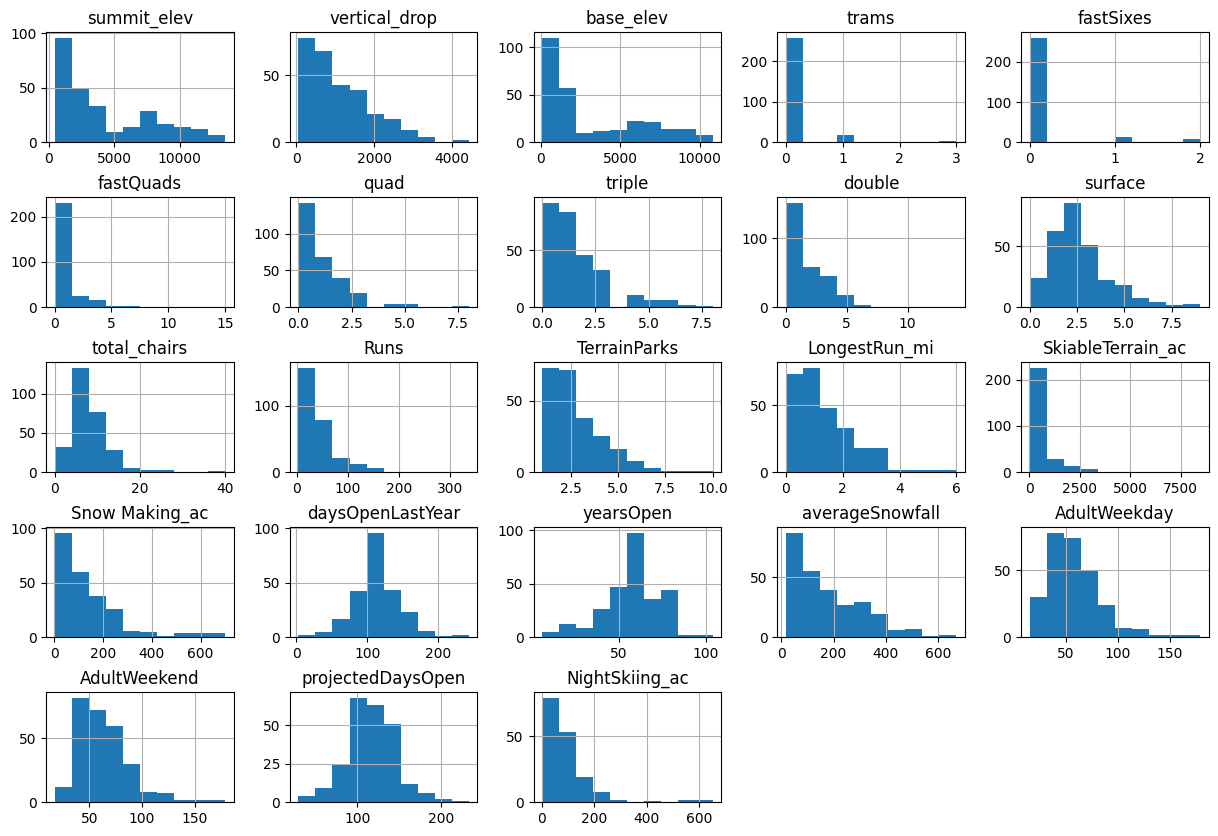

In [46]:
ski_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

## 2.10 Population data<a id='2.10_Population_data'></a>

Population and area data for the US states can be obtained from [wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states). Listen, you should have a healthy concern about using data you "found on the Internet". Make sure it comes from a reputable source. This table of data is useful because it allows you to easily pull and incorporate an external data set. It also allows you to proceed with an analysis that includes state sizes and populations for your 'first cut' model. Be explicit about your source (we documented it here in this workflow) and ensure it is open to inspection. All steps are subject to review, and it may be that a client has a specific source of data they trust that you should use to rerun the analysis.

In [47]:
#Code task#
#Use pandas' `read_html` method to read the table from the URL below
#!pip3 install lxml
states_url = 'http://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [48]:
type(usa_states)

list

In [49]:
len(usa_states)

1

In [50]:
usa_states = usa_states[0]
usa_states.head()

Name & postal abbs. [1]                                 Cities               \
  Name & postal abbs. [1] Name & postal abbs. [1].1      Capital   Largest[5]   
0                 Alabama                        AL   Montgomery   Birmingham   
1                  Alaska                        AK       Juneau    Anchorage   
2                 Arizona                        AZ      Phoenix      Phoenix   
3                Arkansas                        AR  Little Rock  Little Rock   
4              California                        CA   Sacramento  Los Angeles   

  Established[A] Population [B][3] Total area[4]          Land area[4]  \
  Established[A] Population [B][3]           mi2      km2          mi2   
0   Dec 14, 1819           4903185         52420   135767        50645   
1    Jan 3, 1959            731545        665384  1723337       570641   
2   Feb 14, 1912           7278717        113990   295234       113594   
3   Jun 15, 1836           3017804         53179   137732        52035   
4    Sep 9, 1850          39512223        163695   423967       155779   

           Water area[4]         Number of Reps.  
       km2           mi2     km2 Number of Reps.  
0   131171          1775    4597               7  
1  1477953         94743  245384               1  
2   294207           396    1026               9  
3   134771          1143    2961               4  
4   403466          7916   20501              53

In [51]:
established = usa_states.iloc[:, 4]

In [52]:
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[A], Established[A]), dtype: obj

Extract the state name, population, and total area (square miles) columns.

In [53]:
usa_states_sub = usa_states.iloc[:, [0,5,6]].copy()
usa_states_sub.columns = ['state', 'state_population', 'state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


Do you have all the ski data states accounted for?

In [54]:
#Code task 32#
#Find the states in `state_summary` that are not in `usa_states_sub`
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

In [55]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[C]
37     Pennsylvania[C]
38     Rhode Island[D]
45         Virginia[C]
47       West Virginia
Name: state, dtype: object

Delete square brackets and their contents and try again:

In [56]:
usa_states_sub.state.replace(to_replace='\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [58]:
#merge with state_summary
state_summary = state_summary.merge(usa_states_sub, how='left', on='state')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ag,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


## 2.11 Target Feature<a id='2.11_Target_Feature'></a>

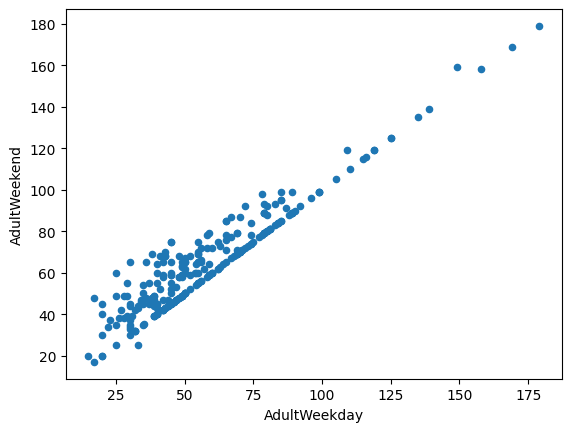

In [59]:
ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind='scatter');

A couple of observations can be made. Firstly, there is a clear line where weekend and weekday prices are equal. Weekend prices being higher than weekday prices seem restricted to sub $100 resorts. 

In [60]:
#Code task 37#
#Use the loc accessor on ski_data to print the 'AdultWeekend' and 'AdultWeekday' columns for Montana only
ski_data.loc[ski_data.state == 'Montana', ['AdultWeekday', 'AdultWeekend']]

,AdultWeekday,AdultWeekend
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


Is there any reason to prefer weekend or weekday prices? Which is missing the least?

In [61]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

AdultWeekend    4
AdultWeekday    7
dtype: int64

Weekend prices have the least missing values of the two, so drop the weekday prices and then keep just the rows that have weekend price.

In [62]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [63]:
ski_data.shape

(277, 25)

### 2.11.1 Number Of Missing Values By Row - Resort<a id='2.11.1_Number_Of_Missing_Values_By_Row_-_Resort'></a>

Having dropped rows missing the desired target ticket price, what degree of missingness do you have for the remaining rows?

In [64]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
329,5,20.0
62,5,20.0
141,5,20.0
86,5,20.0
74,5,20.0
146,5,20.0
184,4,16.0
108,4,16.0
198,4,16.0
39,4,16.0


In [67]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non-null

## 2.12 Save data<a id='2.12_Save_data'></a>

In [68]:
ski_data.shape

(277, 25)

In [69]:
# save the data to a new csv file
ski_data.to_csv("./data/ski_data_cleaned.csv")


"with open('ski_data_cleaned.csv', 'w') as file:\n    writer = csv.writer(file)\n    \n    # write multiple rows\n    writer.writerows(ski_data)"

In [71]:
# save the state_summary separately.
#datapath = '../data'
#save_file(state_summary, 'state_summary.csv', datapath)
state_summary.to_csv('./data/state_summary.csv')


"with open('state_summary.csv', 'w') as file:\n    writer = csv.writer(file)\n    \n    # write multiple rows\n    writer.writerows(ski_data)"

## 2.13 Summary<a id='2.13_Summary'></a>

3** This notebook contains the initial data analysis and visualization for comparing the pricing model of Big Mountain Resort to that of its competitors.
	The database provided (‘ski_resort-data.csv’) initially consisted of data on each of 330 ski resorts (including our target Big Mountain Resort) as a row entry, and 27 columns with descriptive data for that resort describing its name, state, facilities, and size. 
	The names of all but two of the resorts were unique, but it was found that there are two ‘Crystal Mountain’ resorts, however their entries are unique because they are located in different states.
	Average ticket prices were compared on a state-by-state basis, and Montana where Big Mountain Resort is was found to be slightly below the median price per state. A melt and transpose of the ski_data data frame was used to generate a box plot to compare the distribution of ticket prices per state.
	A few erroneous data entries were cleaned, including the falsely large ‘skiiableTerain’ at Silverton mountain and the age of Pine Knob Ski Resort. The “fast eight” column was eliminated from the data set because only one resort, not Big Mountain, reported having this facility.
	Finally, rows representing resorts that do not include any price data were eliminated, as they are not useful in modeling the price which Big Mountain can charge for their tickets. At the end of this cleaning and analysis, the ski_data data frame consisted of 277 unique resort entries, and 25 columns of data with which to develop a model for Ticket Pricing.
